# Student Data Challenge Jan 2018

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict ### data structure.. for laziness
import seaborn as sns
import operator
%matplotlib inline

In [2]:
df = pd.read_csv('X_train.csv')
df.head()

,Doctor Identifier,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,450181093,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,375128823,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,429379427,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,993555030,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,786413532,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [3]:
df.dtypes

Doctor Identifier                                        int64
Provider Type                                           object
Number of Services                                       int64
Number of Beneficiaries                                  int64
Total Submitted Charge Amount                          float64
Total Allowed Amount                                   float64
Total Payment Amount                                   float64
Total Standardized Payment Amount                      float64
Number of Drug Services                                  int64
Total Drug Submitted Charge Amount                     float64
Total Drug Allowed Amount                              float64
Total Drug Payment Amount                              float64
Total Drug Standardized Payment Amount                 float64
Number of Medical Services                               int64
Percent Atrial Fibrillation                            float64
Percent Alzheimer’s Disease or Dementia                

In [7]:
# one hot encode the provider type
# np.unique(df['Provider Type'].values).size
# 30 + 84

df_ohe = pd.get_dummies(df, 'Provider Type')
df_ohe.head()

,Doctor Identifier,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,450181093,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,375128823,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,0,0,0,0,0,0,0,0,0,0
2,429379427,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,0,0,0,0,0,0,0,0,0,0
3,993555030,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,786413532,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_ohe['Total Allowed Amount'].hist(20)

ValueError: Grouper for '20' not 1-dimensional

In [5]:
# add some new features (average per number of services)
Submitted_Charge_per_Service = df['Total Submitted Charge Amount'].values/ df['Number of Services']
Allowed_amount

In [54]:
#  Standardize 
def standardize(x, x_ref):
    mean = np.mean(x_ref);
    std = np.std(x_ref);

    x_stand = (x - mean)/std;
    return x_stand

df_num = df_ohe.iloc[:, 1:30].copy();
df_num_unstand = df_num.copy()
df_num_stand = standardize(df_num, df_num_unstand)

df_stand = pd.concat([df.iloc[:, 0], df_num_stand, df_ohe.iloc[:, 30:]], axis =1)

In [56]:
# finalize as df train
df_train = df_stand.copy()

In [57]:
df_train['Number of Services'].values

array([-0.054057  ,  0.07810371,  0.04771298, ...,  0.16230161,
       -0.05892731, -0.06909652])

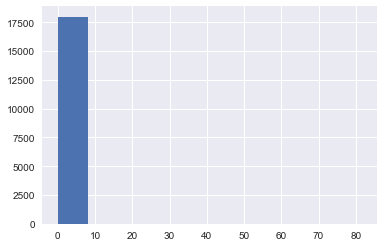

In [61]:
df_train['Number of Services'].hist()

In [62]:
df_train['Number of Services']

0       -0.054057
1        0.078104
2        0.047713
3       -0.071512
4       -0.067304
5        0.047791
6       -0.047784
7       -0.071045
8       -0.031693
9       -0.069915
10      -0.019186
11      -0.064226
12      -0.047901
13      -0.061499
14      -0.001847
15      -0.066681
16      -0.035862
17      -0.044862
18      -0.010224
19      -0.068006
20      -0.048252
21      -0.062979
22      -0.002821
23      -0.044122
24      -0.057992
25       0.066103
26      -0.040537
27       0.001815
28      -0.063642
29      -0.054836
           ...   
17970   -0.007964
17971   -0.047940
17972    0.108378
17973   -0.058927
17974    0.005127
17975   -0.006055
17976   -0.072642
17977   -0.067850
17978   -0.058732
17979   -0.019731
17980   -0.067967
17981   -0.039875
17982   -0.044472
17983   -0.048875
17984   -0.046303
17985   -0.068278
17986   -0.029550
17987   -0.003834
17988    0.138418
17989   -0.066915
17990   -0.068824
17991   -0.029316
17992   -0.065551
17993    0.042492
17994   -0